In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
data_merged = pd.DataFrame.merge(mouse_metadata,study_results)

# Display the data table for preview
data_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

data_clean = data_merged.drop_duplicates(subset=["Mouse ID","Timepoint"])
data_clean_df = pd.DataFrame(data_clean)

In [4]:
# Checking the number of mice in the clean DataFrame.

num_mice = len(data_merged.groupby("Mouse ID").nunique())

In [5]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 

agg_stats = data_clean.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg([
    'mean',
    'median',
    'var',
    'std',
    'sem'])

# Assemble the resulting series into a single summary dataframe.

agg_stats_df = pd.DataFrame(agg_stats)
agg_stats_df.head()

# Rename columns for clarity

agg_stats_clean = agg_stats_df.rename(columns={"mean":"Mean","median":"Median","var":"Variance","std":"Std. Dev.","sem":"SEM"})
agg_stats_clean.columns

Index(['Mean', 'Median', 'Variance', 'Std. Dev.', 'SEM'], dtype='object')

In [6]:
# Verify mouse count to validate data moving forward

mouse_count = data_clean_df.pivot_table(index=['Drug Regimen','Mouse ID'], aggfunc='size')

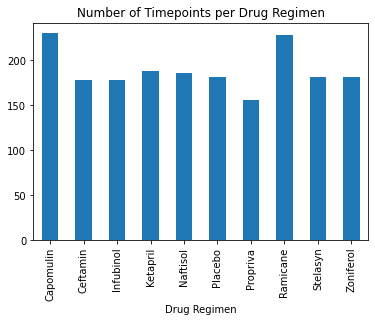

In [7]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_data = data_clean_df[['Drug Regimen','Mouse ID','Timepoint']]
bar_data_group = bar_data.groupby("Drug Regimen")
time_counts = bar_data_group["Timepoint"].count()

pandas_bar = time_counts.plot(kind='bar',title="Number of Timepoints per Drug Regimen")

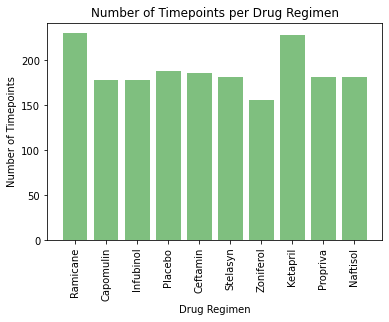

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

num_timepoints = data_clean_df.groupby(["Drug Regimen"]).size()
treatment_names = pd.unique(pd.Series(data_clean_df["Drug Regimen"]))

bar_x = list(treatment_names)
bar_y = list(num_timepoints)

x_drug = np.arange(len(treatment_names))
tick_locations = [value+0.4 for value in x_drug]

plt.bar(bar_x,bar_y,color='g',alpha=0.5,align="edge")
plt.xticks(tick_locations, treatment_names,rotation="vertical")

plt.title('Number of Timepoints per Drug Regimen')
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

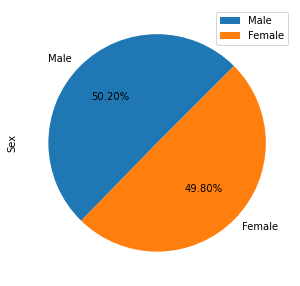

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

plot_df = pd.DataFrame(mouse_metadata["Sex"].value_counts())
plot = plot_df.plot(kind='pie',y="Sex",startangle = 45,figsize = (5,5), autopct = '%1.2f%%')

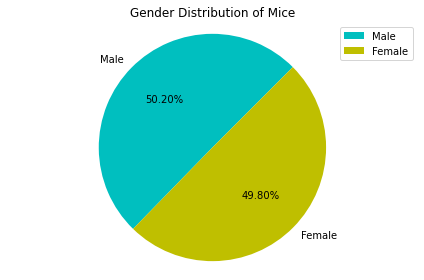

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = pd.unique(pd.Series(data_merged["Sex"]))
gender_sort = mouse_metadata["Sex"].value_counts()
plt.title("Gender Distribution of Mice")
colors = ["c","y"]

plt.pie(gender_sort, labels = gender,autopct="%1.2f%%",colors=colors,startangle=45)
plt.axis('equal')
plt.tight_layout()
plt.legend(loc='best')

In [11]:
# Truncate list of regimens so only the requested 4 regimens remain

regimens = ("Capomulin","Ramicane","Infubinol","Ceftamin")
regimen_trunc = data_clean_df.loc[data_clean_df["Drug Regimen"].isin(regimens)]
regimen_trunc.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Get the last (greatest) timepoint for each mouse along with other necessary data

final_timepoint = regimen_trunc.groupby(["Mouse ID"])[["Drug Regimen","Timepoint","Tumor Volume (mm3)"]].max()

print(final_timepoint)

         Drug Regimen  Timepoint  Tumor Volume (mm3)
Mouse ID                                            
a203        Infubinol         45           67.973419
a251        Infubinol         45           65.525743
a275         Ceftamin         45           62.999356
a411         Ramicane         45           45.466677
a444         Ramicane         45           45.000000
...               ...        ...                 ...
y769         Ceftamin         45           68.594745
y793        Capomulin         45           45.000000
y865         Ceftamin         45           64.729837
z578         Ramicane         45           45.000000
z581        Infubinol         45           62.754451

[100 rows x 3 columns]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = pd.unique(pd.Series(final_timepoint["Drug Regimen"]))

In [15]:
# Prep data for boxplot - reset index
plot_data_init = final_timepoint.reset_index()[["Drug Regimen","Tumor Volume (mm3)"]]

In [16]:
# Create empty dictionary and iterate data through rows in for loop. Create array of each drug and corresponding tumor volumes.
regimens_dict = {}

for index, row in plot_data_init.iterrows():
    row_reg = row["Drug Regimen"]
    tumor_weight = row["Tumor Volume (mm3)"]

    if row_reg not in regimens_dict:
        regimens_dict[row_reg] = []

    regimens_dict[row_reg].append(tumor_weight)

In [17]:
# Verify boxplot keys

boxplot_df = pd.DataFrame(regimens_dict)
boxplot_df.keys()

Index(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype='object')

In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
treatment_df=pd.DataFrame(columns=["Lower Quartile","Upper Quartile","IQR","Lower Bound","Upper Bound"],index=treatments)

for treatment in treatments:

    tumor_data = boxplot_df[treatment]

    quartiles = tumor_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    treatment_df.loc[treatment]=[lowerq,upperq,iqr,lower_bound,upper_bound]

print(treatment_df)

    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset    
    # Determine outliers using upper and lower bounds

          Lower Quartile Upper Quartile      IQR Lower Bound Upper Bound
Infubinol        54.0486        65.5257  11.4771     36.8329     82.7414
Ceftamin         48.7221        64.2998  15.5778     25.3554     87.6665
Ramicane              45        46.3438  1.34383     42.9843     48.3596
Capomulin             45         46.749  1.74901     42.3765     49.3725


{'whiskers': [<matplotlib.lines.Line2D at 0x237d9232d30>,
 'caps': [<matplotlib.lines.Line2D at 0x237d9242240>,
 'boxes': [<matplotlib.lines.Line2D at 0x237d9226e48>,
 'medians': [<matplotlib.lines.Line2D at 0x237d9242940>,
 'fliers': [<matplotlib.lines.Line2D at 0x237d9242cc0>,
 'means': []}

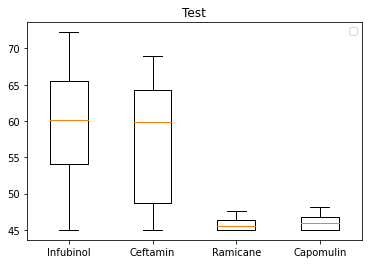

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig,ax=plt.subplots()
ax.set_title("Test")
ax.set_xticklabels(regimens_dict.keys())

val1 = regimens_dict["Infubinol"]
val2 = regimens_dict["Ceftamin"]
val3 = regimens_dict["Ramicane"]
val4 = regimens_dict["Capomulin"]
data = [val1,val2,val3,val4]

ax.legend([val1, val2, val3, val4, [treatments]], loc='upper right')

ax.boxplot(data,showfliers=True)

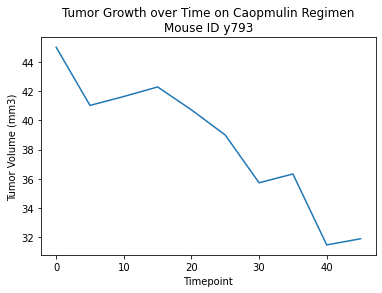

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
regimen_reindex = regimen_trunc.set_index("Mouse ID")
capomulin_line = regimen_reindex.loc["y793",:]
line_timepoint = capomulin_line["Timepoint"]
line_volume = capomulin_line["Tumor Volume (mm3)"]

plt.plot(line_timepoint,line_volume)
plt.title ("Tumor Growth over Time on Caopmulin Regimen\nMouse ID y793")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [25]:
# Filter and prep data for Capomulin regimen summary

capomulin_data = regimen_reindex.loc[regimen_reindex["Drug Regimen"]=="Capomulin"]
capomulin_data

cap_mouse = capomulin_data.groupby("Mouse ID")
cap_stats = cap_mouse.agg({"Tumor Volume (mm3)":'mean', "Weight (g)":'mean'})

Text(0.5, 1.0, 'Average Tumor Volume vs Mouse Weight')

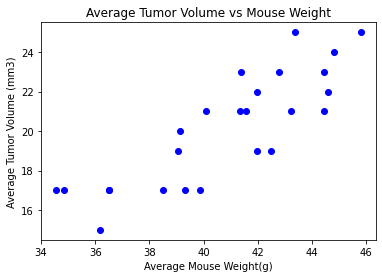

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_tumvol = cap_stats["Tumor Volume (mm3)"]
cap_weight = cap_stats["Weight (g)"]

plt.scatter(cap_tumvol,cap_weight,c="blue")
plt.xlabel('Average Mouse Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Mouse Weight')

In [23]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(cap_tumvol,cap_weight)
print (f"The correlation between tumor volume and mouse weight is {round(correlation[0],2)}")

The correlation between tumor volume and mouse weight is 0.84


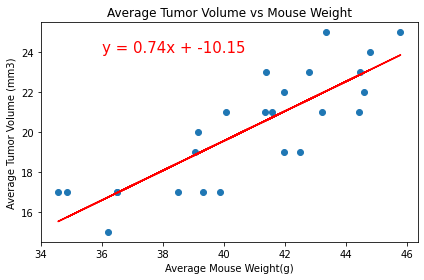

In [24]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Add linear regression line to scatter plot

x_values = cap_tumvol
y_values = cap_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(36,24),fontsize=15,color="red")
plt.xlabel('Average Mouse Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Mouse Weight')
plt.tight_layout()

plt.show()